In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
from google.colab import files
uploaded = files.upload()


Saving cloud_workload_dataset.csv to cloud_workload_dataset.csv


In [6]:
df = pd.read_csv("cloud_workload_dataset.csv")
df.head()


,Job_ID,Task_Start_Time,Task_End_Time,CPU_Utilization (%),Memory_Consumption (MB),Task_Execution_Time (ms),System_Throughput (tasks/sec),Task_Waiting_Time (ms),Data_Source,Number_of_Active_Users,Network_Bandwidth_Utilization (Mbps),Job_Priority,Scheduler_Type,Resource_Allocation_Type,Error_Rate (%)
0,JOB_1,2024-01-01 00:00:00,2024-01-01 00:00:00,39.96,3622,2734,9.03,83,IoT,3000,112.97,Low,FCFS,Static,1.65
1,JOB_2,2024-01-01 00:01:00,2024-01-01 00:01:00,86.06,5690,2868,8.03,64,Social Media,4590,329.20,Low,Priority-Based,Dynamic,2.92
2,JOB_3,2024-01-01 00:02:00,2024-01-01 00:02:00,68.56,5075,1311,5.69,971,Cloud,3780,542.82,Low,Priority-Based,Static,2.60
3,JOB_4,2024-01-01 00:03:00,2024-01-01 00:03:00,57.89,7686,875,4.51,757,Social Media,4474,973.94,Medium,Priority-Based,Dynamic,1.33
4,JOB_5,2024-01-01 00:04:00,2024-01-01 00:04:00,22.48,2297,1260,6.38,581,Enterprise DB,1981,405.38,Low,FCFS,Static,1.99


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Job_ID                                5000 non-null   object 
 1   Task_Start_Time                       5000 non-null   object 
 2   Task_End_Time                         5000 non-null   object 
 3   CPU_Utilization (%)                   5000 non-null   float64
 4   Memory_Consumption (MB)               5000 non-null   int64  
 5   Task_Execution_Time (ms)              5000 non-null   int64  
 6   System_Throughput (tasks/sec)         5000 non-null   float64
 7   Task_Waiting_Time (ms)                5000 non-null   int64  
 8   Data_Source                           5000 non-null   object 
 9   Number_of_Active_Users                5000 non-null   int64  
 10  Network_Bandwidth_Utilization (Mbps)  5000 non-null   float64
 11  Job_Priority     

In [8]:
df.describe()


,CPU_Utilization (%),Memory_Consumption (MB),Task_Execution_Time (ms),System_Throughput (tasks/sec),Task_Waiting_Time (ms),Number_of_Active_Users,Network_Bandwidth_Utilization (Mbps),Error_Rate (%)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,49.746602,4218.142800,2509.336800,5.271740,507.632400,2565.994200,499.520224,2.521932
std,23.170651,2142.393544,1415.060641,2.713111,287.408833,1431.848731,283.969648,1.453217
min,10.000000,502.000000,102.000000,0.500000,10.000000,50.000000,10.070000,0.000000
25%,29.510000,2339.000000,1286.750000,2.940000,263.000000,1327.000000,252.487500,1.260000
50%,50.000000,4235.500000,2484.500000,5.290000,506.000000,2614.000000,501.600000,2.520000
75%,69.850000,6039.000000,3731.000000,7.560000,757.000000,3794.250000,744.025000,3.800000
max,89.980000,7998.000000,4999.000000,10.000000,999.000000,4998.000000,999.730000,5.000000


In [9]:
df.isna().sum()


,0
Job_ID,0
Task_Start_Time,0
Task_End_Time,0
CPU_Utilization (%),0
Memory_Consumption (MB),0
Task_Execution_Time (ms),0
System_Throughput (tasks/sec),0
Task_Waiting_Time (ms),0
Data_Source,0
Number_of_Active_Users,0


In [10]:
df.columns = (
    df.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.replace("(", "", regex=False)
    .str.replace(")", "", regex=False)
    .str.replace("%", "pct")
)


In [11]:
df.columns


Index(['Job_ID', 'Task_Start_Time', 'Task_End_Time', 'CPU_Utilization_pct',
       'Memory_Consumption_MB', 'Task_Execution_Time_ms',
       'System_Throughput_tasks/sec', 'Task_Waiting_Time_ms', 'Data_Source',
       'Number_of_Active_Users', 'Network_Bandwidth_Utilization_Mbps',
       'Job_Priority', 'Scheduler_Type', 'Resource_Allocation_Type',
       'Error_Rate_pct'],
      dtype='object')

In [12]:
threshold = df["Error_Rate_pct"].quantile(0.75)
df["High_Error"] = (df["Error_Rate_pct"] > threshold).astype(int)


In [13]:
df["High_Error"].value_counts()


,count
High_Error,
0,3753
1,1247


In [14]:
df = df.drop(["Job_ID", "Task_Start_Time", "Task_End_Time"], axis=1)


In [15]:
categorical_cols = ["Data_Source", "Job_Priority", "Scheduler_Type", "Resource_Allocation_Type"]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [16]:
X = df.drop(["High_Error", "Error_Rate_pct"], axis=1)
y = df["High_Error"]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [18]:
model = RandomForestClassifier(
    n_estimators=100,
    class_weight="balanced",
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      1.00      0.86       751
           1       0.00      0.00      0.00       249

    accuracy                           0.75      1000
   macro avg       0.38      0.50      0.43      1000
weighted avg       0.56      0.75      0.64      1000



In [19]:
from imblearn.over_sampling import SMOTE


In [20]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [21]:
np.bincount(y_train_res)


array([3002, 3002])

In [22]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=1,
    class_weight=None,     # important: remove balanced
    random_state=42
)

model.fit(X_train_res, y_train_res)


RandomForestClassifier(n_estimators=300, random_state=42)

In [23]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.92      0.82       751
           1       0.16      0.04      0.07       249

    accuracy                           0.70      1000
   macro avg       0.45      0.48      0.45      1000
weighted avg       0.60      0.70      0.64      1000



In [24]:
y_proba = model.predict_proba(X_test)[:, 1]


In [25]:
y_pred_adj = (y_proba > 0.35).astype(int)
print(classification_report(y_test, y_pred_adj))


              precision    recall  f1-score   support

           0       0.74      0.59      0.66       751
           1       0.23      0.37      0.28       249

    accuracy                           0.54      1000
   macro avg       0.48      0.48      0.47      1000
weighted avg       0.61      0.54      0.56      1000



In [26]:
model = RandomForestClassifier(
    n_estimators=600,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight=None,
    random_state=42
)


In [27]:
model.fit(X_train_res, y_train_res)


RandomForestClassifier(n_estimators=600, random_state=42)

In [28]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.93      0.83       751
           1       0.17      0.04      0.07       249

    accuracy                           0.71      1000
   macro avg       0.46      0.49      0.45      1000
weighted avg       0.60      0.71      0.64      1000



In [29]:
y_proba = model.predict_proba(X_test)[:, 1]

for t in [0.5, 0.45, 0.40, 0.35, 0.30]:
    print("\nThreshold:", t)
    y_pred_adj = (y_proba > t).astype(int)
    print(classification_report(y_test, y_pred_adj))



Threshold: 0.5
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       751
           1       0.17      0.04      0.07       249

    accuracy                           0.71      1000
   macro avg       0.46      0.49      0.45      1000
weighted avg       0.60      0.71      0.64      1000


Threshold: 0.45
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       751
           1       0.20      0.10      0.13       249

    accuracy                           0.68      1000
   macro avg       0.47      0.48      0.47      1000
weighted avg       0.61      0.68      0.64      1000


Threshold: 0.4
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       751
           1       0.22      0.20      0.21       249

    accuracy                           0.62      1000
   macro avg       0.48      0.48      0.48      1000
weighted avg       0.61  

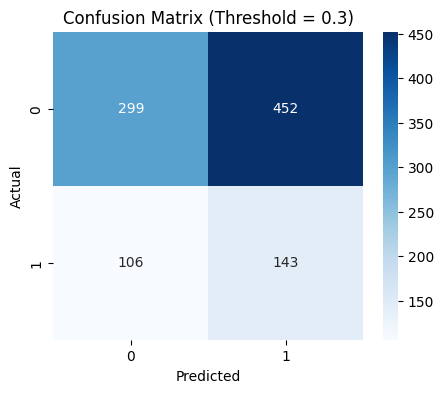

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_proba = model.predict_proba(X_test)[:, 1]
threshold = 0.30   # or 0.35 depending on your choice
y_pred_adj = (y_proba > threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_adj)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Threshold = {threshold})")
plt.show()


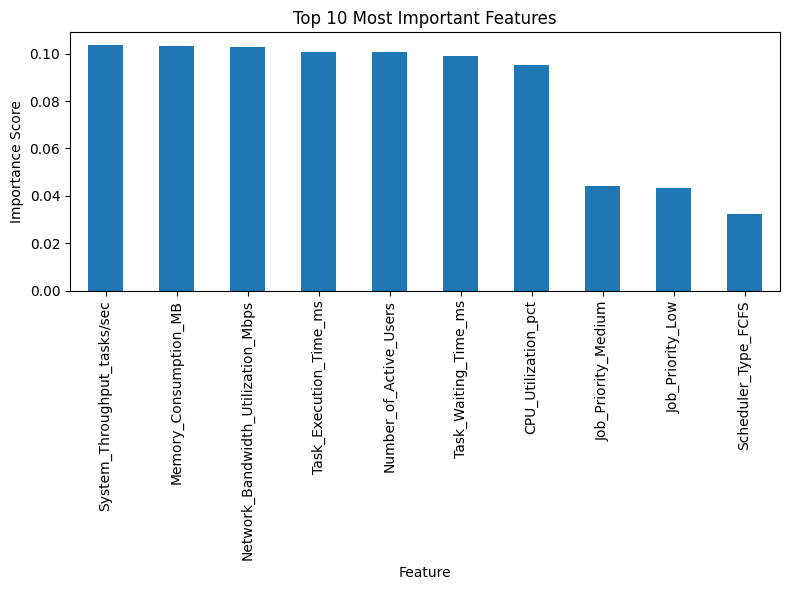

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False).head(10)  # top 10

plt.figure(figsize=(8,6))
importances.plot(kind="bar")
plt.title("Top 10 Most Important Features")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


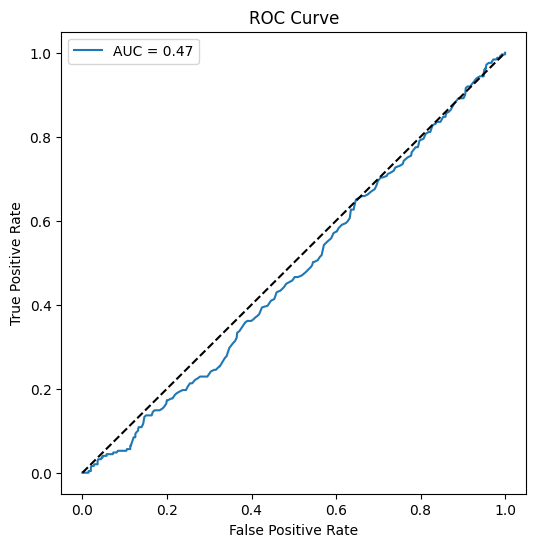

In [32]:
from sklearn.metrics import roc_curve, auc

y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


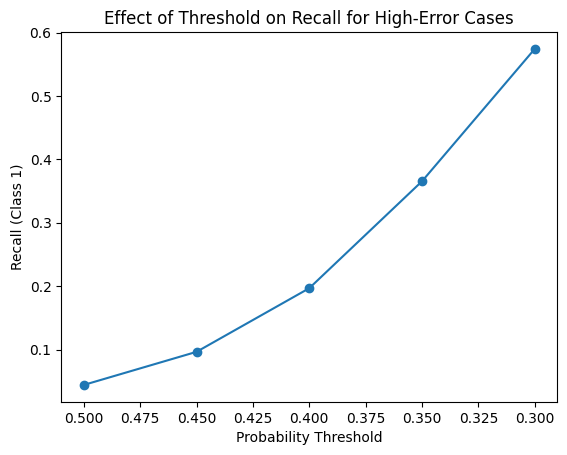

In [33]:
thresholds = [0.5, 0.45, 0.40, 0.35, 0.30]
recalls = []

from sklearn.metrics import recall_score

for t in thresholds:
    y_pred_adj = (y_proba > t).astype(int)
    recalls.append(recall_score(y_test, y_pred_adj))

plt.plot(thresholds, recalls, marker='o')
plt.xlabel("Probability Threshold")
plt.ylabel("Recall (Class 1)")
plt.title("Effect of Threshold on Recall for High-Error Cases")
plt.gca().invert_xaxis()  # so 0.5 → 0.3 left-to-right
plt.show()


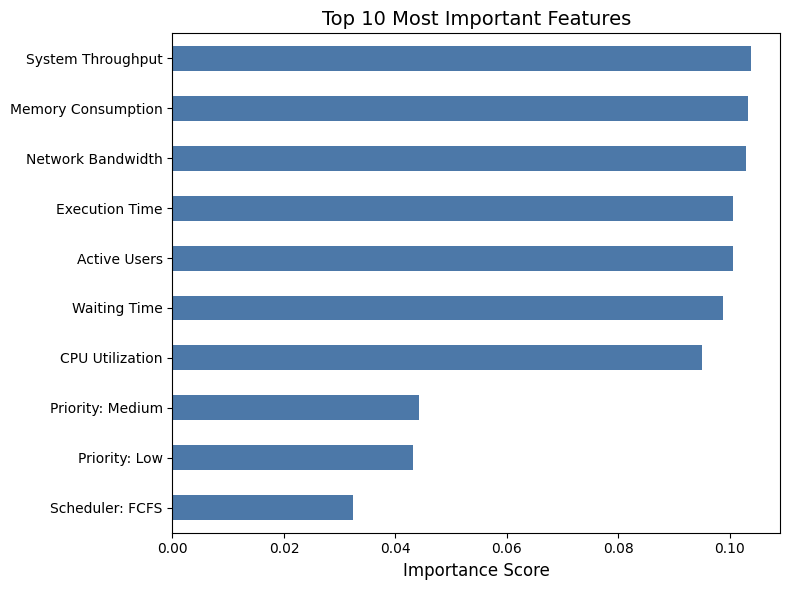

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Get importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False).head(10)

# Create a mapping of short names
short_names = {
    'System_Throughput_tasks/sec': 'System Throughput',
    'Memory_Consumption_MB': 'Memory Consumption',
    'Network_Bandwidth_Utilization_Mbps': 'Network Bandwidth',
    'Task_Execution_Time_ms': 'Execution Time',
    'Number_of_Active_Users': 'Active Users',
    'Task_Waiting_Time_ms': 'Waiting Time',
    'CPU_Utilization_pct': 'CPU Utilization',
    'Job_Priority_Medium': 'Priority: Medium',
    'Job_Priority_Low': 'Priority: Low',
    'Scheduler_Type_FCFS': 'Scheduler: FCFS'
}

# Replace long names with short names
importances.index = [short_names.get(col, col) for col in importances.index]

plt.figure(figsize=(8,6))
importances.sort_values().plot(kind="barh", color="#4C78A8")
plt.title("Top 10 Most Important Features", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("")
plt.tight_layout()
plt.show()
